# Data Analysis: Costco vs. Kroger 

#### Project Scope:
The goal of this project is answer a question with data.  Utilizing multiply data sources, I will be analyzing the consumable products of two commercial retailers to determine which is generally going to be the healthier option by comparing and analyzing some of their highest graded consumable items.  

#### Data Sources:
World.OpenFoodFacts Documentation:
- https://openfoodfacts.github.io/openfoodfacts-server/api/ref-v2/#get-/api/v2/search
- https://openfoodfacts.github.io/openfoodfacts-server/api/#overview
- https://world.openfoodfacts.org/data
- https://static.openfoodfacts.org/data/data-fields.txt

Article:
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6506980/



In [143]:
# import python libraries
import requests
import re
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#### Gathering Data:
First thing we will do is gather some data from the world.openfoodfacts API for both Costco and Kroger.  We can rationalize the data by comparing products of similar nutrition grades.  This will allow us to create a generalization for products offered with both retailers since the products they offer may differ.  Thus, we will generalize which is healthier based on the mean of the first X returned items.     

In [114]:
# Define variables to query to the world.openfoodfacts API endpoints

root = "https://world.openfoodfacts.org/api/v2/"
search_params = "search?stores_tags=Costco&nutrition_grades_tags=a"
fields = "&fields=code,product_name,nutrition_grades,nutriscore_score,food_groups,stores_tags"


#### Costco:
Since we are currently examining the highest graded foods from Costco we will want to look at the spread of the kinds of items returned from our search to gauge what kinds of items will be compared.

In [116]:
# Turn the first page of data from the search query into a pandas data frame

costco_query = requests.get(root+search_params+fields+"&page=1&page_size=150").json()
costco_data = pd.DataFrame(costco_query['products'])

costco_data


,code,food_groups,nutriscore_score,nutrition_grades,product_name,stores_tags
0,5010003064744,en:bread,-4,a,Seed Sensations,"[costco, sainsbury-s, asda]"
1,94001129,en:fruits,-3,a,Kiwi Sungold,"[colruyt, costco]"
2,5010459005025,en:unsweetened-beverages,0,a,HIGHLAND Still spring water,[costco]
3,0096619194261,en:breakfast-cereals,-2,a,Ancient Grains,[costco]
4,5060321390476,NaN,-5,a,Refried beans,[costco]
...,...,...,...,...,...,...
145,0096619821143,en:vegetables,-5,a,Tomates en dés,[costco]
146,0096619174041,en:fruits,-8,a,Three Berry Blend,[costco]
147,0096619221172,en:fatty-fish,-2,a,Sockeye salmon,[costco]
148,0096619403028,en:waters-and-flavored-waters,0,a,Spring water,[costco]


C:\Users\cgarv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([], [])

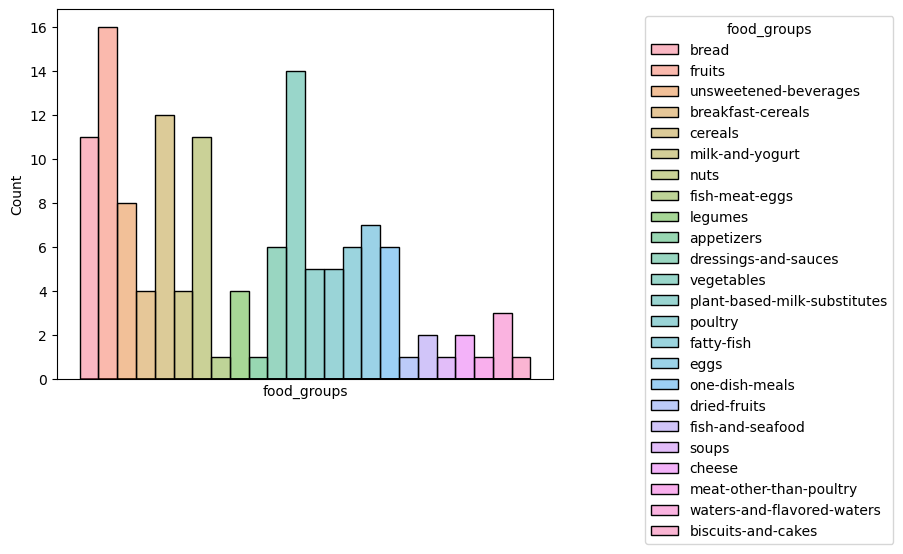

In [137]:
# Note: there are 132 items after the data is cleaned

clean_costco = costco_data.dropna(subset=['food_groups']) # delete rows with NaN
clean_costco.loc[:,'food_groups'] = clean_costco.loc[:,'food_groups'].apply(lambda x: x.split(':')[1])
clean_costco.loc[:,'stores_tags'] = "costco"

# print(clean_costco.count())
ax = sns.histplot(data=clean_costco,x='food_groups',hue='food_groups',legend=True)
sns.move_legend(ax,'upper right',bbox_to_anchor=(1.7,1))
plt.xticks([])


#### Kroger:
Since we are currently examining the highest graded foods from Kroger we will want to look at the spread of the kinds of items returned from our search to gauge what kinds of items will be compared.

In [119]:

search_params = "search?stores_tags=Kroger&nutrition_grades_tags=a"


In [120]:

kroger_query = requests.get(root+search_params+fields+"&page=1&page_size=150").json()

kroger_data = pd.DataFrame(kroger_query['products'])
kroger_data


,code,food_groups,nutriscore_score,nutrition_grades,product_name,stores_tags
0,0073472001202,en:bread,-6,a,Ezekiel bread original sprouted organic,"[whole-foods, walmart, meijer, kroger]"
1,0011110816405,en:unsweetened-beverages,0,a,Purified drinking water,"[kroger, smith-s]"
2,0041143128701,en:dried-fruits,-1,a,California Sun-dried Raisins,[kroger]
3,0858089003142,en:ice-cream,-4,a,Chocolate Chip Cookie Dough Light Ice Cream,"[whole-foods, woolworths, coles, kroger]"
4,0011110917348,NaN,-1,a,Santa fe style with chicken salad kit for one,[kroger]
...,...,...,...,...,...,...
145,0011110886453,en:nuts,-9,a,Dry roasted lightly salted peanuts,[kroger]
146,0011110503244,en:milk-and-yogurt,-1,a,Milk,[kroger]
147,0011110861207,en:cereals,-5,a,Arborio Rice,[kroger]
148,0011110462701,NaN,-1,a,Fat Free Sour Cream,[kroger]


C:\Users\cgarv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([], [])

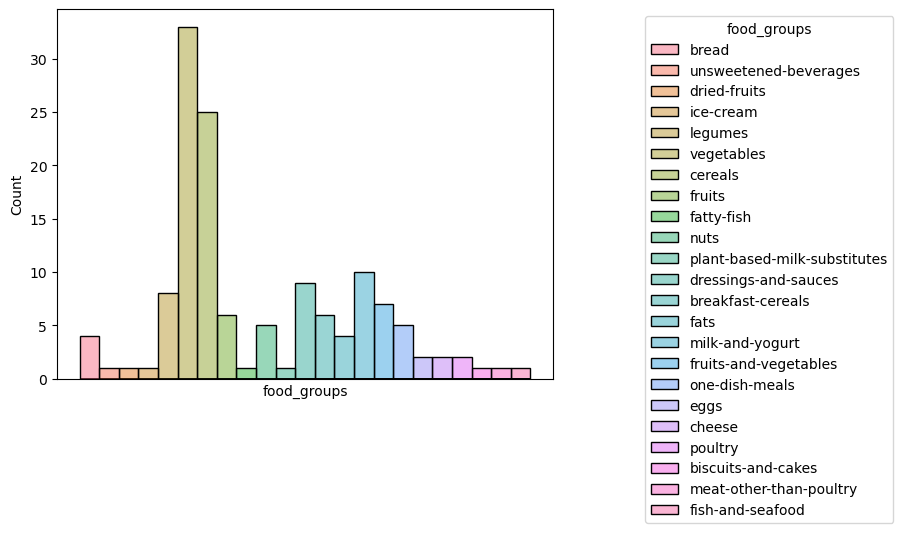

In [135]:
# Note: there are 137 items after the data is cleaned 

clean_kroger = kroger_data.dropna(subset=['food_groups']) # delete rows with NaN
clean_kroger.loc[:,'food_groups'] = clean_kroger.loc[:,'food_groups'].apply(lambda x: x.split(':')[1])
clean_kroger.loc[:,'stores_tags'] = "kroger"

# print(clean_kroger.count())
ax = sns.histplot(data=clean_kroger,x='food_groups',hue='food_groups',legend=True)
sns.move_legend(ax,'upper right',bbox_to_anchor=(1.7,1))
plt.xticks([])


Now that we can visualize the spread of the returned items, we see that each retailer has a higher count in different kinds of items.  This is important to take into consideration beacause in general, different kinds of foods can be considered healthier for different reasons (ie. having less sugar, healthier fats, higher protien, nutrient density, etc).
##### Costco:
- Fruits
- Cereals
- Vegetables

##### Kroger:
- Vegetables
- Cereals
- Milk and Yogurt

However, keeping this in mind we want to now take a look at the nutriscores of these items.  This will help us see where the average score of the items from both retailers stands.  The nutriscore of an item can be classified in two ways, it will have a letter gradin, A through E, or a numerical grade -15 through 40.  Where grades such as 'A' and '-15' are healthier and grades like 'E' and '40' are very unhealthy.

C:\Users\cgarv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cgarv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='nutriscore_score'>

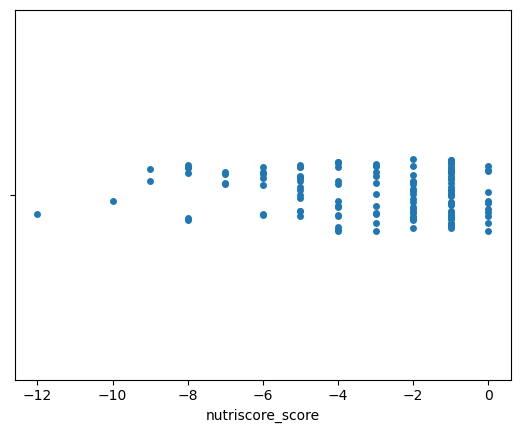

In [123]:
# Nutriscore range for Costco

sns.stripplot(data=clean_costco,x='nutriscore_score')


C:\Users\cgarv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cgarv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='nutriscore_score'>

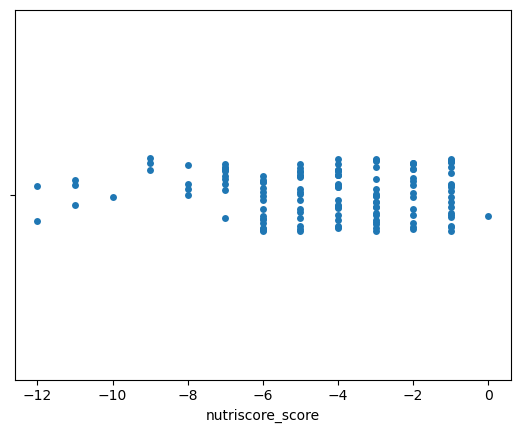

In [124]:
# Nutriscore range for Kroger

sns.stripplot(data=clean_kroger,x='nutriscore_score')


After examining the two strip plots we see that the data is fairly similar.  However, it looks like Kroger has a bit of an edge on Costco by having more items spanning higher up the grading scale.  Lets take at look at what items lie so far up the scale.

In [125]:
# Return the top 5 healthiest foods

def top5foods(data):
    return data.query("nutriscore_score <= -8").head()
    

In [138]:

costco_top5 = top5foods(clean_costco)
costco_top5


,code,food_groups,nutriscore_score,nutrition_grades,product_name,stores_tags
31,0096619309658,vegetables,-9,a,Organic Mixed. Vegetables,costco
51,0665290001429,fruits,-8,a,Strawberries,costco
65,0769197108028,fruits,-8,a,Framboise,costco
78,0041331060400,legumes,-10,a,Red Kidney Beans,costco
82,0096619174010,fruits,-8,a,Frozen Three Berry Blend,costco


In [139]:

kroger_top5 = top5foods(clean_kroger)
kroger_top5


,code,food_groups,nutriscore_score,nutrition_grades,product_name,stores_tags
11,0011110816368,vegetables,-8,a,Tomato Paste,kroger
17,0011110806505,vegetables,-8,a,Riced Cauliflower,kroger
18,0011110107213,cereals,-11,a,Gluten Free Red Lentil Penne Pasta,kroger
23,0011110897367,vegetables,-12,a,"Kroger, green peas",kroger
67,0011110861221,vegetables,-11,a,"Kroger, red lentils",kroger


Seeing that Costco has a higher frequency of fruits and Kroger has a higher frequency of vegetables.  We want to compare what makes each of these food groups healthy.  From this, we then can look at the item distribution between Costco and Kroger to see how the items of each compare.

But first, lets take a look at an article comparing fruits and vegetables before we look at the data.

In [128]:
# Use RegEx to find some interesting pieces of information from the article located in the .txt file

with open('fruits_vegetables.txt','r',encoding='utf-8') as file:
    contents = file.read()
    
    pattern = r'[^.!?]*\b[Nn]utrient\b[^.!?]*\.'
    
#   [^.!?]* - matches any character that is not between the square brakcets
#   \b - word boundry so we know either 'Nutrient' or 'nutrient' was found
    
    results = re.findall(pattern,contents)
    for line in results:
        print(line,'\n')
    

 By comparing the 10 most commonly consumed vegetables versus fruits, we found that vegetables scored higher on the Aggregate Nutrient Density Index and contained fewer calories and more fiber than fruits. 

 Prioritizing one over the other to optimize health could be based on nutrient density or other nutrient quality scores. 



Two scores that have been used to rank foods are the Aggregate Nutrient Density Index (ANDI) and NuVal scores. 

 Nutritionally, when considering energy density and nutrient density, whereas both food groups beat all packaged processed junk foods to a pulp, there was a trend for vegetables to edge out fruits. 



Given the information returned from searching pieces of the article, it is clear that the National Library of Medicine is giving the edge to vegetables.  Vegetables tend to be more nutrient dense than fruits, thus they are ranked higher when given a score under Aggregate Nutrient Dense Index criteria (ANDI).

Lets take a look at the vegetables from Costco and Kroger.


In [150]:
# Combine all vegetables from both Costco and Kroger so we can visualize their differences
# Only use first 14 since Costco only has 14 vegetables in its distribution of items 

costco_vegetables = clean_costco.query("food_groups == 'vegetables'").head(14)
kroger_vegetables = clean_kroger.query("food_groups == 'vegetables'").head(14)

all_vegetables = pd.concat([costco_vegetables, kroger_vegetables],axis=0)
all_vegetables


,code,food_groups,nutriscore_score,nutrition_grades,product_name,stores_tags
28,0096619180905,vegetables,-5,a,Artichoke Hearts,costco
31,0096619309658,vegetables,-9,a,Organic Mixed. Vegetables,costco
58,0096619581870,vegetables,-1,a,Minced California Garlic,costco
71,0096619998340,vegetables,-5,a,Cut Green Beans with Sea Salt,costco
84,0096619263424,vegetables,-2,a,Chopped onion,costco
89,0096619828647,vegetables,-4,a,Organic Tomato Paste,costco
111,0096619937332,vegetables,-3,a,"Kirkland Signature Organic Tomato Paste, 6oz C...",costco
121,0096619254767,vegetables,-1,a,Coeurs artichauts,costco
123,0096619937349,vegetables,-1,a,Organic Tomato Sauce,costco
133,0096619255351,vegetables,-8,a,Frozen Mixed Vegetables Normandy-Style,costco


<Axes: xlabel='nutriscore_score', ylabel='stores_tags'>

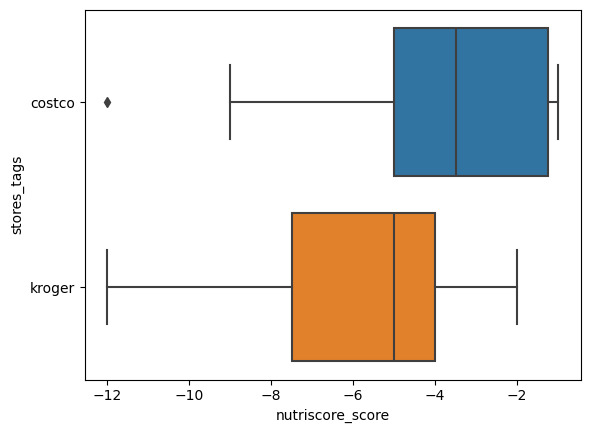

In [151]:

sns.boxplot(data=all_vegetables,x='nutriscore_score',y='stores_tags')


By utilizing a boxplot, we can gauge the distribution of scores between Costco and Kroger.  We see that the score distribution of Kroger is more negative than that of Costco.  Since the grading scale rates foods with higher nutrient density more negative, we can conclude that the distribution of vegetables from Kroger is higher than that of Costco and thus we can infer that Kroger might be the healthier choice.  